In [1]:
import numpy as np
import pandas as pd
import os
import time

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#path to files
path = 'Datasets/Ex2'
all_files = os.listdir(path)

Loading the datasets

In [4]:
#load data
pd_train_data = pd.read_csv(path + '/' + all_files[0])
pd_test_data = pd.read_csv(path + '/' + all_files[2])
pd_x_with_lab = pd_train_data[pd_train_data.columns[1:]] # remove id and class


pd_train_data_X = pd_train_data[pd_train_data.columns[2:]] # remove id and class
pd_test_data_X = pd_test_data[pd_test_data.columns[1:]] # remove id



plotting the datasets

In [5]:
pd_x_with_lab

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,republican,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
214,republican,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
215,democrat,y,n,y,n,n,y,y,y,y,y,y,n,n,n,n,y
216,democrat,y,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y


# Preprocessing the data

In [6]:
#---train data

#data
pd_train_data_X = pd_train_data_X.replace('n',0)
pd_train_data_X = pd_train_data_X.replace('y',1)
pd_train_data_X = pd_train_data_X.replace('unknown',np.nan)  

pd_train_data_Y = pd_train_data[pd_train_data.columns[1]]



#---test Data
#data

pd_test_data_X = pd_test_data_X.replace('n',0)
pd_test_data_X = pd_test_data_X.replace('y',1)
pd_test_data_X = pd_test_data_X.replace('unknown',np.nan)

#labels

Distribution of labels data

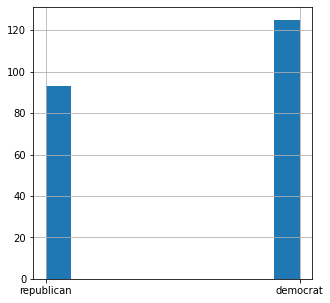

In [7]:
#distibution of labels in training se
plt.figure()
ax = pd_train_data_Y.hist(figsize=(5,5))
fig = ax.get_figure()
fig.savefig('class_distribution.png')

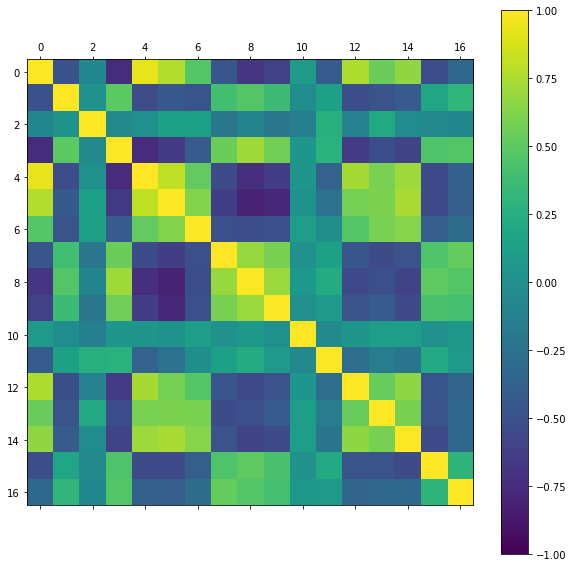

In [112]:
#show corelation matrixx
pd_x_with_lab_cor = pd_x_with_lab.replace('republican',1)
pd_x_with_lab_cor = pd_x_with_lab_cor.replace('democrat',0)
pd_x_with_lab_cor = pd_x_with_lab_cor.replace('y',1)
pd_x_with_lab_cor = pd_x_with_lab_cor.replace('n',0)
pd_x_with_lab_cor = pd_x_with_lab_cor.replace('unknown',np.nan)

correlations = pd_x_with_lab_cor.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.yaxis.label.set_rotation(90)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()
fig.savefig('congress-output/plots/corelation_matrixx.png')

In [52]:
pd_x_with_lab_cor

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,n,y,n,y,y,y,y,n,n,n,y,y,y,y,n,y
1,0,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
2,0,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
3,1,n,unknown,n,y,y,y,n,n,n,y,n,y,y,y,n,y
4,0,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
214,1,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
215,0,y,n,y,n,n,y,y,y,y,y,y,n,n,n,n,y
216,0,y,y,y,n,n,n,y,y,y,y,n,n,n,n,y,y


In [9]:
#Show non_zero-values

co11=pd_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     212 non-null    float64
 1   water-project-cost-sharing              198 non-null    float64
 2   adoption-of-the-budget-resolution       214 non-null    float64
 3   physician-fee-freeze                    213 non-null    float64
 4   el-salvador-aid                         212 non-null    float64
 5   religious-groups-in-schools             211 non-null    float64
 6   anti-satellite-test-ban                 209 non-null    float64
 7   aid-to-nicaraguan-contras               211 non-null    float64
 8   mx-missile                              204 non-null    float64
 9   immigration                             215 non-null    float64
 10  synfuels-crporation-cutback             206 non-null    float6

In [76]:
pd_republican_only = pd_train_data_X.loc[pd_train_data ['class'] == 'republican']
pd_democrat_only = pd_train_data_X.loc[pd_train_data ['class'] == 'democrat']

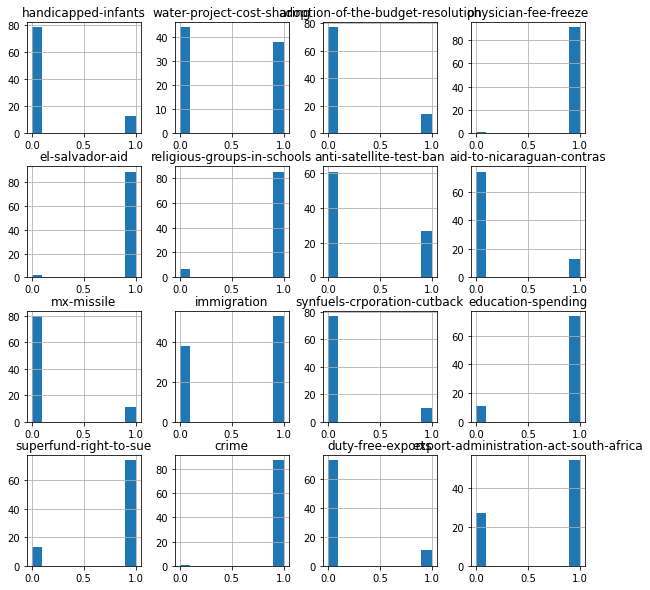

In [10]:
fig_hist = pd_republican_only.hist(figsize=(10,10))


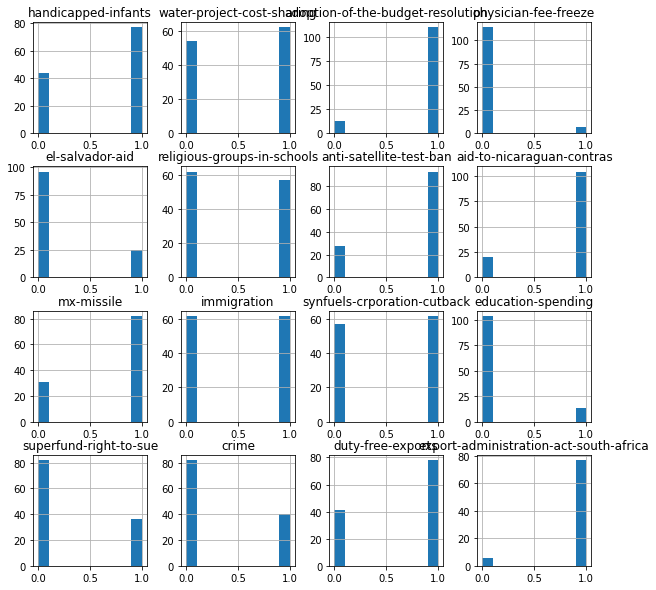

In [11]:
fig_hist = pd_democrat_only.hist(figsize=(10,10))

Preprocessing

In [71]:
#Preprocessing 1

pd_train_data_X = pd_train_data_X.replace(np.nan,0)
pd_train_data_X = pd_train_data_X.replace('n',1)
pd_train_data_X = pd_train_data_X.replace('y',2).astype(np.int)


pd_train_data_Y = pd_train_data[pd_train_data.columns[1]]
pd_train_data_Y = pd_train_data_Y.replace('republican',1)
pd_train_data_Y = pd_train_data_Y.replace('democrat',0).astype(np.int)


#---test Data
#data
pd_test_data_X = pd_test_data_X.replace(np.nan,0)
pd_test_data_X = pd_test_data_X.replace('n',1)
pd_test_data_X = pd_test_data_X.replace('y',2).astype(np.int)



In [72]:
pd_train_data_X

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1
1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1
2,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
3,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1
4,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
214,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0
215,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1
216,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [84]:
#preprosessing 2
from usefull_functions import under_sample
from usefull_functions import over_sample

all_data = pd.concat((pd_train_data_Y,pd_train_data_X),axis=1)
pd_X_balanced, pd_Y_balanced, pd_new = over_sample(all_data, 125)

In [139]:
#preprosessing 3
col_list = list(pd_train_data_X.columns)
col_list.remove('water-project-cost-sharing')
col_list.remove('immigration')

pd_X_train_selected = pd_train_data_X[col_list]
pd_X_test_selected = pd_test_data_X[col_list]

In [138]:
pd_X_train_selected

,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0,1,1,1,1,0,0,1,1,1,1,0,1
1,1,1,0,0,0,1,1,1,0,0,0,0,1,1
2,1,1,0,0,0,1,1,1,0,0,0,0,1,1
3,0,0,1,1,1,0,0,0,0,1,1,1,0,1
4,1,1,0,0,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1,1,0,0,0,1,1,1,0,0,0,0,1,1
214,0,0,1,1,1,0,0,0,0,1,0,0,0,0
215,1,1,0,0,1,1,1,1,1,0,0,0,0,1
216,1,1,0,0,0,1,1,1,0,0,0,0,1,1


# Building models

--------------------------------------------------------------------------------------------------------

### Naive Bayers approach

In [94]:
gaussian_NB = GaussianNB()
start_time = time.time()
model_NB = gaussian_NB.fit(pd_train_data_X, pd_train_data_Y)
stop_time = time.time()

metrics = ['accuracy', 'f1', 'precision', 'recall']

print('Score with imbalanced dataset (Preprocessing 2): ')
for x in metrics:
    scores = cross_val_score(model_NB, pd_train_data_X, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with imbalanced dataset (Preprocessing 2): 
accuracy score is 0.9540169133192389
f1 score is 0.9470181517549939
precision score is 0.9282623224728488
recall score is 0.967251461988304


In [115]:
#balanced dataset (Preprocessing 2+4)
gaussian_NB = GaussianNB()
start_time = time.time()
model_NB = gaussian_NB.fit(pd_X_balanced, pd_Y_balanced)
stop_time = time.time()

print('Score with balanced dataset (Preprocessing 1+2): ')
for x in metrics:
    scores = cross_val_score(model_NB, pd_X_balanced, pd_Y_balanced, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with balanced dataset (Preprocessing 2+4): 
accuracy score is 0.952
f1 score is 0.9523746416084885
precision score is 0.9483719983719985
recall score is 0.96


In [141]:
gaussian_NB = GaussianNB()
start_time = time.time()
model_NB = gaussian_NB.fit(pd_X_train_selected, pd_train_data_Y)
stop_time = time.time()

print('Score with balanced dataset (Preprocessing 1+3): ')
for x in metrics:
    scores = cross_val_score(model_NB, pd_X_train_selected, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with balanced dataset (Preprocessing 1+3): 
accuracy score is 0.9540169133192389
f1 score is 0.9470181517549939
precision score is 0.9282623224728488
recall score is 0.967251461988304


In [42]:
print('time to fit the NB approach is {}'.format(stop_time - start_time))

time to fit the NB approach is 0.002996683120727539


In [37]:
prediction = model_NB.predict(pd_train_data_X)
prediction = pd.DataFrame(prediction)
prediction = prediction.replace(1,'republican')
prediction = prediction.replace(0,'democrat')
prediction.to_csv('congress-output/Prediction_Results/Voting_dataset_NB_predictions.csv')

--------------------------------------------------------------------------------------------------------

### SVC Classifier

In [12]:
SVC_m = SVC()
hyperparameters = {'C': np.linspace(1,100,10), 
                   'kernel': ['rbf', 'poly', 'sigmoid'],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

metrics = ['accuracy', 'f1', 'precision', 'recall']

Grid_search_SVC = GridSearchCV(SVC_m, hyperparameters, cv=5,  return_train_score=True, scoring = metrics, refit='accuracy')
model = Grid_search_SVC.fit(pd_train_data_X, pd_train_data_Y)


In [23]:
#make predistion on test set and dave the results
prediction = model.predict(pd_train_data_X)
prediction = pd.DataFrame(prediction)
prediction = prediction.replace(1,'republican')
prediction = prediction.replace(0,'democrat')
prediction.to_csv('congress-output/Prediction_Results/Voting_dataset_SVC_predictions.csv')


In [14]:
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best gamma:', model.best_estimator_.get_params()['gamma'])
print('Best Kernel:', model.best_estimator_.get_params()['kernel'])
pd.DataFrame(model.cv_results_).to_csv('congress-output\Data\congress_SVC_output-model.csv')

Best C: 78.0
Best gamma: 0.01
Best Kernel: sigmoid


In [96]:
print('Score with imbalanced dataset (Preprocessing 1): ')
for x in metrics:
    scores = cross_val_score(model, pd_train_data_X, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with imbalanced dataset (Preprocessing 2): 
accuracy score is 0.9540169133192389
f1 score is 0.9470181517549939
precision score is 0.9282623224728488
recall score is 0.967251461988304


In [142]:
#balanced dataset (prep 1 + 2)
SVC_m = SVC(C = 78, gamma=0.01, kernel='sigmoid')
model_SVC = SVC_m.fit(pd_X_balanced, pd_Y_balanced)

print('Score with balanced dataset (Preprocessing 1+2): ')
for x in metrics:
    scores = cross_val_score(model_SVC, pd_X_balanced, pd_Y_balanced, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with balanced dataset (Preprocessing 1+2): 
accuracy score is 0.9640000000000001
f1 score is 0.9641571194762684
precision score is 0.9555555555555557
recall score is 0.976


In [144]:
#balanced dataset (prep 1 + 3)
SVC_m = SVC(C = 78, gamma=0.01, kernel='sigmoid')
model_SVC = SVC_m.fit(pd_X_train_selected, pd_train_data_Y)

print('Score with balanced dataset (Preprocessing 1+3): ')
for x in metrics:
    scores = cross_val_score(model_SVC, pd_X_train_selected, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))


Score with balanced dataset (Preprocessing 1+3): 
accuracy score is 0.9495771670190274
f1 score is 0.9424651372019793
precision score is 0.9188888888888889
recall score is 0.9678362573099415


--------------------------------------------------------------------------------------------------------

### Random Forest Classifier

In [65]:
Forest = RandomForestClassifier()
hyperparameters = {'n_estimators': np.linspace(10,300,30).astype(np.int), 
                   'max_depth': np.linspace(5,25,5).astype(np.int),
                  'max_features': ['sqrt','log2'],
                  'criterion': ['gini','entropy']}

metrics = ['accuracy', 'f1', 'precision', 'recall']
Grid_search_Forest = GridSearchCV(Forest, hyperparameters, cv=5,  return_train_score=True, scoring = metrics, refit='accuracy')
model_forest = Grid_search_Forest.fit(pd_train_data_X, pd_train_data_Y)

In [63]:
print('Best n_estimators:', model_forest.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', model_forest.best_estimator_.get_params()['max_depth'])
print('Best max_features:', model_forest.best_estimator_.get_params()['max_features'])
print('Best criterion:', model_forest.best_estimator_.get_params()['criterion'])


#pd.DataFrame(model_forest.cv_results_).to_csv('congress-output\Data\congress_FOREST_output-model.csv')

Best n_estimators: 30
Best max_depth: 3
Best max_features: log2
Best criterion: entropy


In [64]:
#make predistion on test set and dave the results
prediction = model_forest.predict(pd_test_data_X)
prediction = pd.DataFrame(prediction)
prediction = prediction.replace(1,'republican')
prediction = prediction.replace(0,'democrat')
prediction.to_csv('congress-output/Prediction_Results/Voting_dataset_FOREST_predictions.csv')


In [98]:
print('Score with imbalanced dataset (Preprocessing 1): ')
for x in metrics:
    scores = cross_val_score(Forest, pd_train_data_X, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with imbalanced dataset (Preprocessing 2): 
accuracy score is 0.9493657505285412
f1 score is 0.9410937253042515
precision score is 0.9256140350877192
recall score is 0.9461988304093568


In [149]:
print('Score with balanced dataset (Preprocessing 1+2): ')
Forest = RandomForestClassifier(n_estimators=3, max_depth=3, max_features='log2', criterion='entropy')
forest_model = Forest.fit(pd_X_balanced, pd_Y_balanced)
for x in metrics:
    scores = cross_val_score(forest_model, pd_X_balanced, pd_Y_balanced, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with balanced dataset (Preprocessing 1+2): 
accuracy score is 0.9279999999999999
f1 score is 0.9448278272368764
precision score is 0.9083942949160342
recall score is 0.9359999999999999


In [151]:
print('Score with Preprocessing 1+3: ')
Forest = RandomForestClassifier(n_estimators=3, max_depth=3, max_features='log2', criterion='entropy')
forest_model = Forest.fit(pd_X_train_selected, pd_train_data_Y)
for x in metrics:
    scores = cross_val_score(forest_model, pd_X_train_selected, pd_train_data_Y, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))

Score with Preprocessing 1+3: 
accuracy score is 0.9586680761099367
f1 score is 0.957010857010857
precision score is 0.9015948963317383
recall score is 0.9251461988304094
